### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv
housing = pd.read_csv('newhousing.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
housing.shape

(545, 16)

In [5]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


## Splitting Data into Training and Testing Sets

In [6]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [7]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

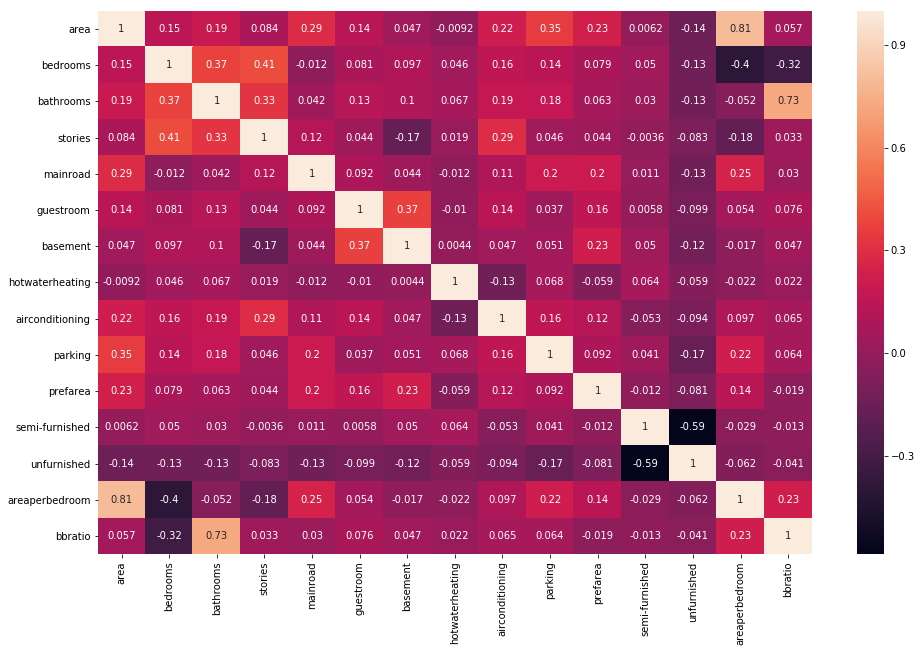

In [8]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [9]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [10]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [11]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.8056104195904634 , min corr:  -0.5884049771343842


In [12]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (0, 13)
Maximum correlation : 0.8056104195904634


In [13]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (3, 11)
Minimum correlation : -0.0036483046040634956


In [14]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### Question No. 1 --


In [15]:
X_train.shape
# We have 15 variables after splitting the data

(381, 15)

In [16]:
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
Xtrain=X_scaler.transform(X_train) 
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
Xtrain.shape

(381, 15)

In [28]:
xtrain_df = pd.DataFrame(Xtrain,columns=X_train.columns)
Xtrain[:,0].max()
xtrain_df['area'].max()

4.98610656210858

In [29]:
ytrain.shape

(381, 1)

In [30]:
Xtest=X_scaler.transform(X_test) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
xtest_df = pd.DataFrame(Xtest,columns=X_train.columns)
xtest_df['guestroom'].min()

-0.4323377011671169

### Question No. 2 --

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Make predictions using the testing set
y_pred = regr.predict(Xtest)

In [33]:
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))

Mean squared error: 0.35
R2 score: 0.65


In [34]:
from sklearn.metrics import explained_variance_score
explained_variance_score(ytest, y_pred) 

0.650291403036704

### Question No. 3 --

In [35]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=100)

In [36]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
aj=pd.DataFrame(pca.components_)

In [46]:
np.max(aj[0])

0.46691142540768166

In [47]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,0.466911,0.253614,area
1,0.131123,-0.501994,bedrooms
2,0.320620,-0.322073,bathrooms
3,0.181371,-0.391036,stories
4,0.298975,0.132957,mainroad
5,0.202099,-0.060133,guestroom
6,0.149324,-0.043661,basement
7,0.004933,-0.122714,hotwaterheating
8,0.257295,-0.113094,airconditioning
9,0.332199,0.046879,parking


In [48]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [49]:
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Feature
0,0.466911,0.253614,-0.083731,-0.098983,-0.195499,0.070468,-0.273913,0.068730,0.373253,0.026806,-0.140376,-0.012615,-0.022318,-0.481254,0.431188,area
1,0.131123,-0.501994,-0.160550,-0.278909,-0.135076,0.203395,-0.371412,-0.095609,0.133579,-0.085303,-0.178241,-0.260943,-0.022348,0.522411,0.148812,bedrooms
2,0.320620,-0.322073,0.491292,0.048436,0.121014,0.035283,-0.146045,-0.186282,0.085092,-0.017169,-0.105249,-0.190787,-0.064773,-0.334211,-0.554016,bathrooms
3,0.181371,-0.391036,0.105153,-0.278201,-0.272607,-0.136165,0.295978,0.059345,0.201221,-0.066632,0.172781,0.679243,0.073244,0.008986,-0.012729,stories
4,0.298975,0.132957,-0.079610,-0.112608,-0.181201,0.154277,0.509562,-0.165138,-0.317433,-0.552863,-0.299977,-0.160644,-0.090223,-0.002066,-0.000785,mainroad
5,0.202099,-0.060133,-0.098555,-0.136369,0.516335,0.016967,0.084193,0.494864,0.173617,-0.373524,0.444739,-0.193923,-0.055659,0.013803,-0.003411,guestroom
6,0.149324,-0.043661,-0.258278,0.025179,0.619524,0.114393,-0.152936,-0.065915,-0.164892,0.011200,-0.456305,0.497569,-0.021707,-0.011530,-0.010790,basement
7,0.004933,-0.122714,0.076514,0.214124,-0.063123,0.729401,0.327913,0.378779,0.086030,0.352480,-0.118630,-0.010145,-0.016878,0.008806,0.004608,hotwaterheating
8,0.257295,-0.113094,-0.062545,-0.271541,0.014394,-0.464931,0.204855,0.360642,-0.289036,0.500269,-0.246527,-0.241065,-0.046889,0.006514,0.005219,airconditioning
9,0.332199,0.046879,0.024069,0.013447,-0.181235,0.227608,-0.359209,0.071095,-0.668183,0.064100,0.434333,0.161911,-0.048221,0.009496,-0.009763,parking


### Question No. 4 --

In [50]:
pca.explained_variance_

array([2.65559436, 2.03987639, 1.67075622, 1.47650977, 1.38551446,
       1.05847568, 0.93569155, 0.85802694, 0.78835172, 0.70619007,
       0.58761968, 0.45176984, 0.37115289, 0.03589467, 0.01804947])

In [51]:
pca.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984, 0.06221571, 0.05705166, 0.05241884, 0.04695577,
       0.03907182, 0.03003894, 0.02467858, 0.0023867 , 0.00120014])

In [32]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [17.7 13.6 11.1  9.8  9.2  7.   6.2  5.7  5.2  4.7  3.9  3.   2.5  0.2
  0.1]


In [52]:
print (pca.explained_variance_ratio_.cumsum())

[0.17657495 0.31220978 0.42330118 0.52147681 0.613602   0.68398184
 0.74619755 0.80324921 0.85566805 0.90262382 0.94169564 0.97173458
 0.99641316 0.99879986 1.        ]


### Question No. 5 --

In [53]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.66,  31.22,  42.33,  52.15,  61.36,  68.4 ,  74.62,  80.33,
        85.57,  90.27,  94.18,  97.18,  99.65,  99.89, 100.01])

### Question No. 6 --

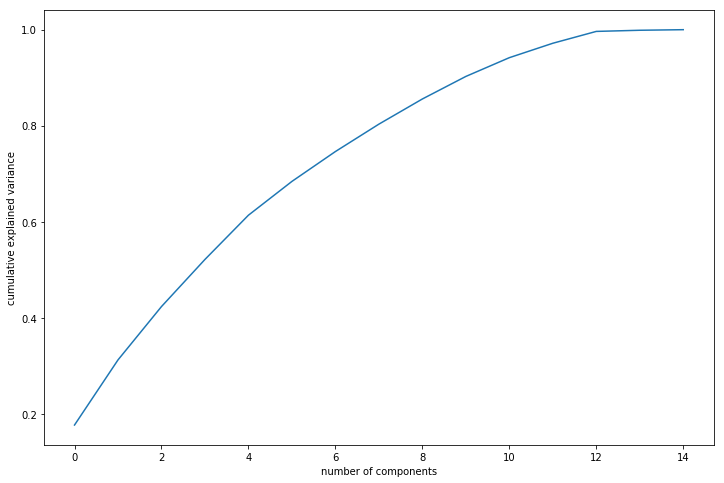

In [55]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [56]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

0.0

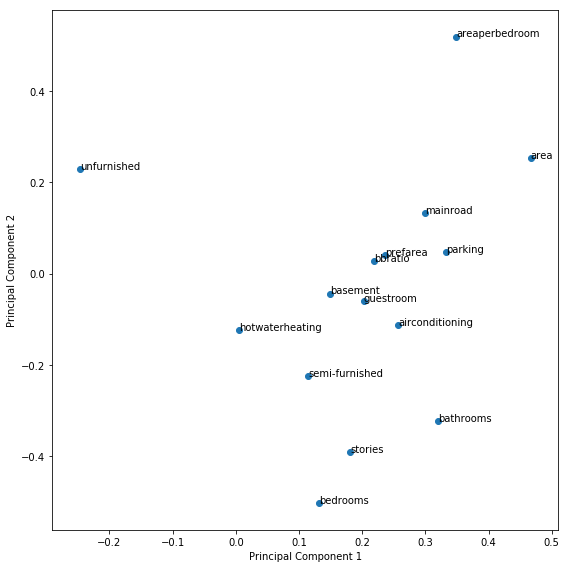

In [57]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [58]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(381, 15)

In [59]:
pca_train

array([[-1.89382742,  1.04859781,  1.12366889, ..., -0.29454944,
        -0.04714831,  0.04708571],
       [ 2.41706253,  0.75177319,  1.560377  , ..., -0.94956138,
        -0.02958512,  0.02039269],
       [ 1.61007146,  0.66810948, -1.0816004 , ...,  0.89630176,
        -0.05850229,  0.02082749],
       ...,
       [ 0.70040283,  1.37263147, -0.36736473, ...,  1.01379374,
        -0.12498705,  0.02645665],
       [ 0.8871212 , -1.01626729,  1.66713038, ..., -0.6926666 ,
         0.04631442, -0.11892837],
       [ 2.20141726, -2.46443025,  1.02634462, ...,  0.89723256,
         0.01122933, -0.0874458 ]])

### Question No. 7 --

In [60]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())

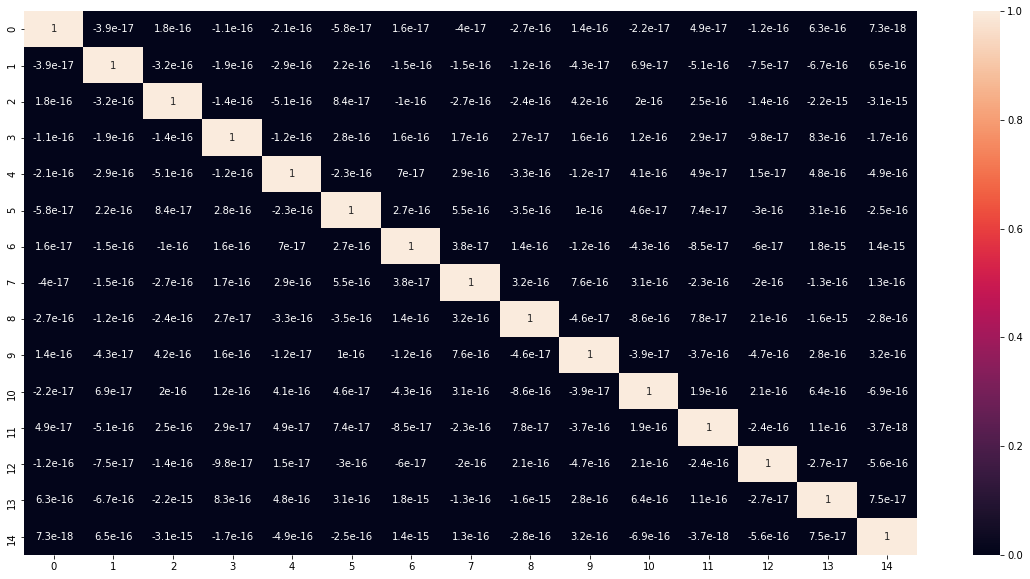

In [61]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [62]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.79830531933937e-15 , min corr:  -3.110819592569876e-15


In [63]:
#Applying selected components to the test data - 13 components
pca_test = pca.transform(Xtest)
pca_test.shape

(164, 15)

### Question No. 8 --

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pca_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pca_pred))

Mean squared error: 0.35
R2 score: 0.65


In [65]:
pca = PCA(n_components=6,random_state=100)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))


Mean squared error: 0.33
R2 score: 0.66
